In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Accumen challenge/TATAMOTORS.NS (2).csv",
                   parse_dates=['Date'],
                   index_col=['Date'])

In [3]:
#preprocessing for NAN values
from sklearn.impute import SimpleImputer

In [4]:
df['Close'].isna().sum()

#There are only 7 NaN values, so it is better to remove them

df=df.dropna()

In [5]:
#No NaN value in the dataset
df['Close'].isna().sum()

0

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-04-06,78.185287,79.699165,77.878677,78.999718,66.239388,11477775.0
2005-04-07,79.526695,81.443001,79.143440,80.877693,67.814018,14158840.0
2005-04-08,81.443001,81.960403,80.254890,81.002251,67.918465,10284740.0
2005-04-11,79.526695,82.267014,79.162598,80.274055,67.307884,13238772.0
2005-04-12,80.676483,81.251373,79.507538,80.657318,67.629234,5348983.0


In [7]:
close_price = df['Close']

In [8]:
stock_price = pd.DataFrame(df["Close"]).rename(columns={"Close": "Price"})
stock_price.head()

,Price
Date,
2005-04-06,78.999718
2005-04-07,80.877693
2005-04-08,81.002251
2005-04-11,80.274055
2005-04-12,80.657318


Text(0.5, 1.0, 'Tata Motors')

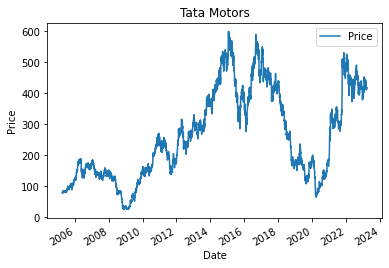

In [9]:
import matplotlib.pyplot as plt

stock_price.plot()
plt.ylabel("Price")
plt.title("Tata Motors")

In [10]:
timesteps = stock_price.index.to_numpy()
prices = stock_price["Price"].to_numpy()

In [11]:
prices

array([ 78.999718,  80.877693,  81.002251, ..., 416.100006, 419.149994,
       416.5     ])

In [12]:
split_size = int(0.8 * len(stock_price))
# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

In [13]:
len(X_train), len(X_test), len(y_train), len(y_test)

(3549, 888, 3549, 888)

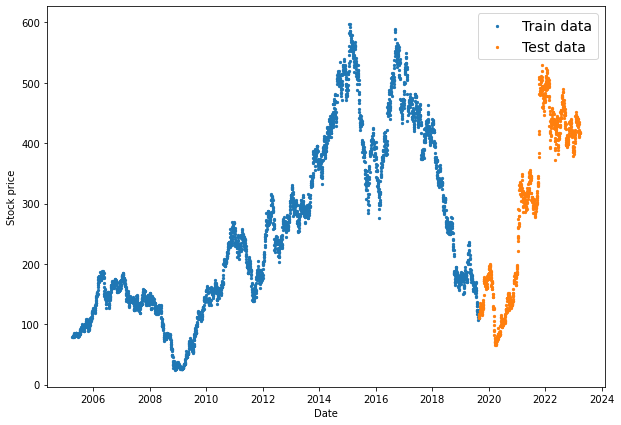

In [14]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("Stock price")
plt.legend(fontsize=14)
plt.show();

In [15]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 40, random_state = 0)

In [16]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7

In [17]:
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [18]:
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [19]:
import numpy as np
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(4430, 4430)

In [20]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [78.999718 80.877693 81.002251 80.274055 80.657318 81.308861 78.587708] -> Label: [80.628571]
Window: [80.877693 81.002251 80.274055 80.657318 81.308861 78.587708 80.628571] -> Label: [79.574608]
Window: [81.002251 80.274055 80.657318 81.308861 78.587708 80.628571 79.574608] -> Label: [82.908981]


In [21]:
time,time_labels = make_windows(timesteps,window_size=WINDOW_SIZE, horizon=HORIZON)
len(time),len(time_labels)

(4430, 4430)

In [22]:
for i in range(3):
  print(f"Window: {time[i]} -> Label: {time_labels[i]}")

Window: ['2005-04-06T00:00:00.000000000' '2005-04-07T00:00:00.000000000'
 '2005-04-08T00:00:00.000000000' '2005-04-11T00:00:00.000000000'
 '2005-04-12T00:00:00.000000000' '2005-04-13T00:00:00.000000000'
 '2005-04-15T00:00:00.000000000'] -> Label: ['2005-04-18T00:00:00.000000000']
Window: ['2005-04-07T00:00:00.000000000' '2005-04-08T00:00:00.000000000'
 '2005-04-11T00:00:00.000000000' '2005-04-12T00:00:00.000000000'
 '2005-04-13T00:00:00.000000000' '2005-04-15T00:00:00.000000000'
 '2005-04-18T00:00:00.000000000'] -> Label: ['2005-04-19T00:00:00.000000000']
Window: ['2005-04-08T00:00:00.000000000' '2005-04-11T00:00:00.000000000'
 '2005-04-12T00:00:00.000000000' '2005-04-13T00:00:00.000000000'
 '2005-04-15T00:00:00.000000000' '2005-04-18T00:00:00.000000000'
 '2005-04-19T00:00:00.000000000'] -> Label: ['2005-04-20T00:00:00.000000000']


In [23]:
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [24]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(3544, 886, 3544, 886)

In [25]:
time_train,time_test,time_train_labels,time_test_labels = make_train_test_splits(time,time_labels)
len(time_train), len(time_test), len(time_train_labels), len(time_test_labels)

(3544, 886, 3544, 886)

In [26]:
train_windows[:5], train_labels[:5]

(array([[78.999718, 80.877693, 81.002251, 80.274055, 80.657318, 81.308861,
         78.587708],
        [80.877693, 81.002251, 80.274055, 80.657318, 81.308861, 78.587708,
         80.628571],
        [81.002251, 80.274055, 80.657318, 81.308861, 78.587708, 80.628571,
         79.574608],
        [80.274055, 80.657318, 81.308861, 78.587708, 80.628571, 79.574608,
         82.908981],
        [80.657318, 81.308861, 78.587708, 80.628571, 79.574608, 82.908981,
         84.221649]]), array([[80.628571],
        [79.574608],
        [82.908981],
        [84.221649],
        [83.761734]]))

In [27]:
regressor.fit(train_windows, train_labels)

<ipython-input-27-4558128dafb5>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_windows, train_labels)


RandomForestRegressor(n_estimators=40, random_state=0)

In [28]:
predictions = regressor.predict(test_windows)
y_test

array([116.349998, 114.300003, 116.699997, 112.650002, 109.5     ,
       118.050003, 121.25    , 121.900002, 134.350006, 127.949997,
       129.550003, 128.600006, 122.      , 121.75    , 124.199997,
       133.25    , 127.900002, 130.899994, 123.050003, 124.5     ,
       119.900002, 117.449997, 115.300003, 122.400002, 119.650002,
       117.5     , 120.900002, 116.800003, 121.300003, 127.849998,
       126.949997, 125.849998, 139.5     , 136.850006, 131.75    ,
       132.649994, 133.5     , 126.849998, 147.699997, 172.449997,
       171.899994, 177.699997, 175.050003, 172.199997, 172.      ,
       174.5     , 171.5     , 169.050003, 172.      , 170.600006,
       167.050003, 168.550003, 170.100006, 167.75    , 167.399994,
       164.149994, 162.350006, 166.100006, 163.399994, 165.899994,
       164.800003, 161.5     , 161.050003, 158.199997, 169.399994,
       166.100006, 161.5     , 160.5     , 159.699997, 161.800003,
       173.350006, 176.699997, 174.949997, 180.199997, 174.800

In [29]:
predictions

array([114.077461  , 115.20978447, 114.0326671 , 109.44564058,
       120.32516372, 120.9522885 , 120.763132  , 134.35396928,
       128.54793005, 129.02604487, 128.30356538, 121.23551928,
       121.14641575, 124.91705612, 135.5650828 , 128.5336154 ,
       130.64378498, 124.09615035, 124.25945595, 120.61455963,
       121.23765197, 114.41074888, 119.44324165, 120.07605335,
       120.4718001 , 120.99400495, 116.04565672, 121.11638028,
       129.10484498, 128.6822092 , 125.54769913, 146.3688676 ,
       135.64292715, 132.30670225, 135.51700563, 137.1939983 ,
       127.35341457, 147.37363937, 172.44532977, 172.28319627,
       178.33170187, 172.90984995, 173.59910277, 171.58430937,
       173.75073792, 171.6206543 , 168.14085048, 171.76900513,
       170.3850062 , 167.791853  , 168.3272865 , 168.90240583,
       167.14599047, 166.88884555, 161.61318448, 162.32611823,
       165.81305615, 163.21166818, 166.13383672, 163.42019275,
       163.17486232, 161.32058638, 156.54971923, 169.80

In [30]:
predictions = predictions.reshape((886,1))
predictions.shape


(886, 1)

In [31]:
time_test_labels.shape

(886, 1)

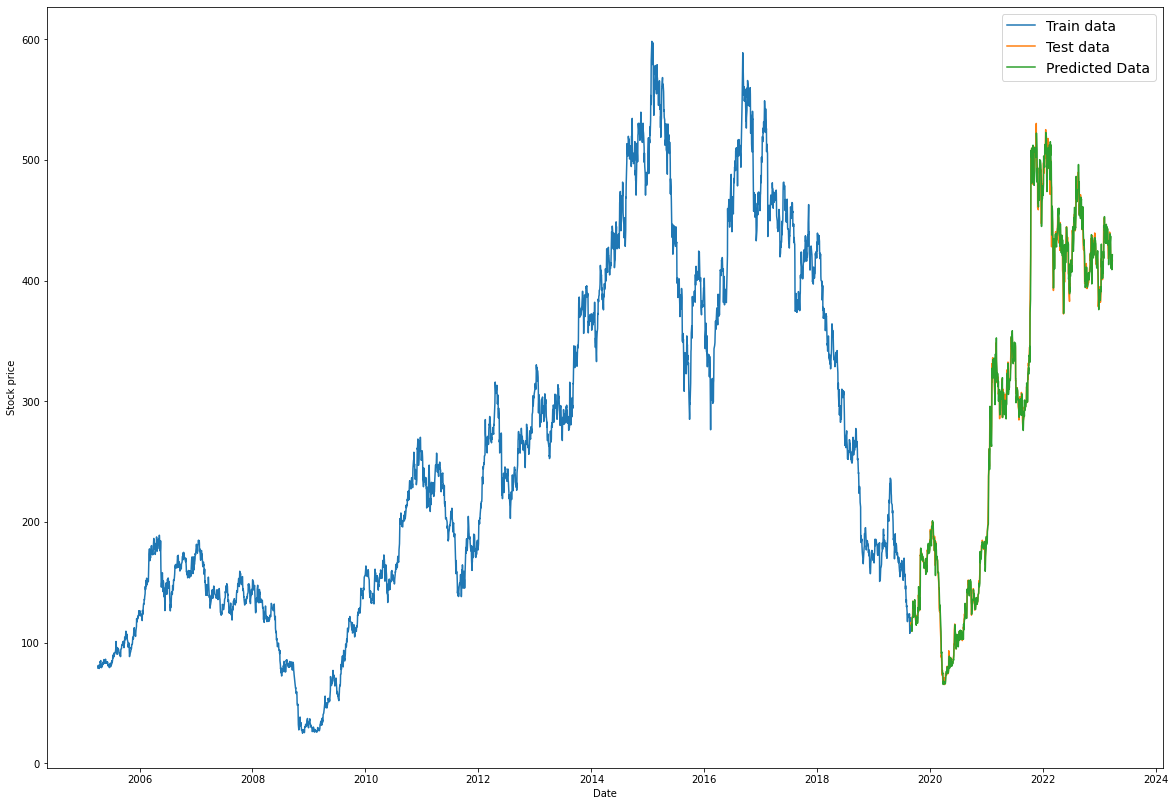

In [32]:
plt.figure(figsize=(20, 14))
plt.plot(X_train, y_train, label="Train data")
plt.plot(X_test, y_test, label="Test data")
plt.plot(time_test_labels,predictions,label = "Predicted Data")
plt.xlabel("Date")
plt.ylabel("Stock price")
plt.legend(fontsize=14)
plt.show()

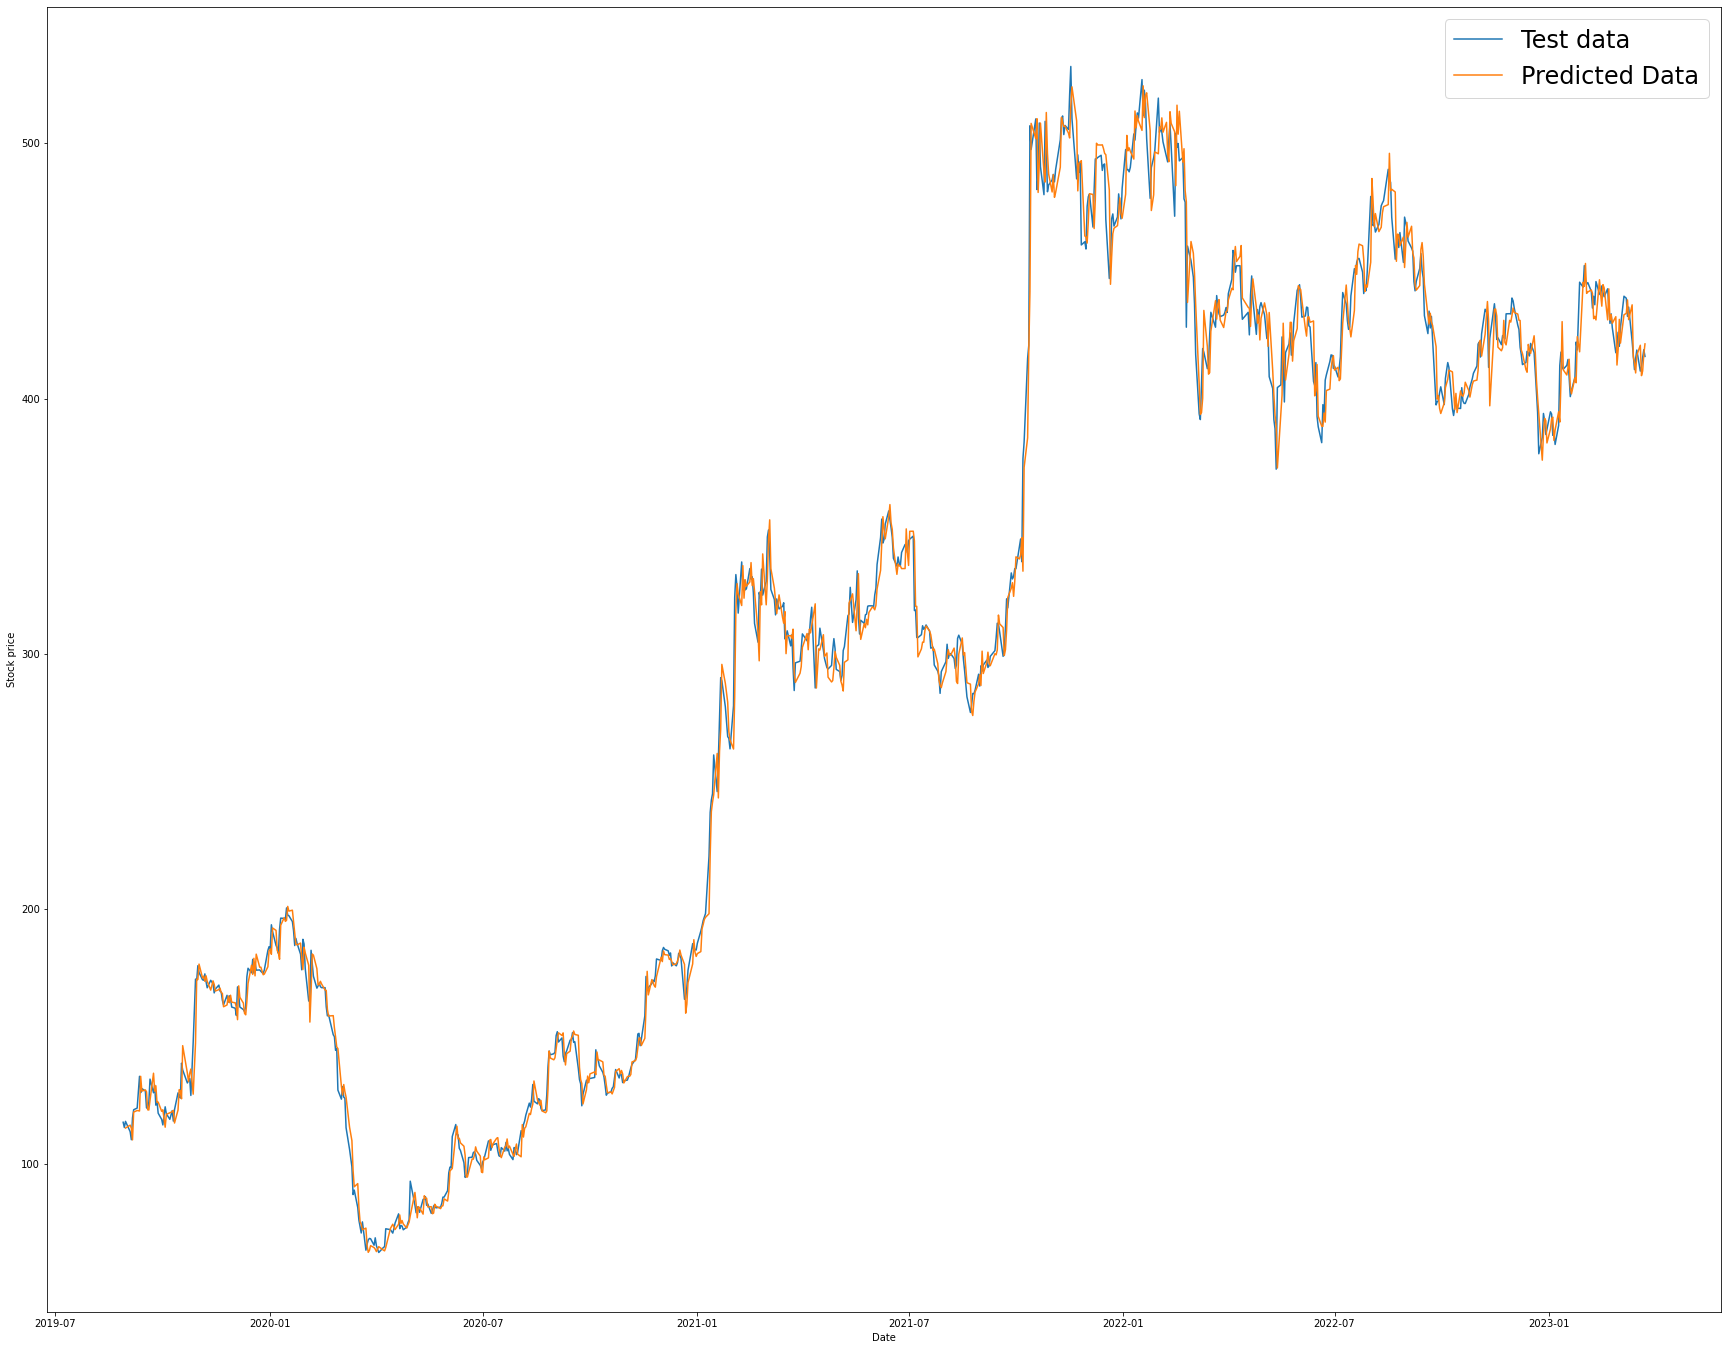

In [33]:
#Zoomed in Visualisation
plt.figure(figsize=(30, 24))
plt.plot(X_test, y_test, label="Test data")
plt.plot(time_test_labels,predictions,label = "Predicted Data")
plt.xlabel("Date")
plt.ylabel("Stock price")
plt.legend(fontsize=24)
plt.show()

In [34]:
##Saving Predicted data and labels to excel
# np.savetxt("predictions.csv", predictions, delimiter=",")

In [35]:
#To save the predictions to .csv file



# import pandas as pd

# ## convert your array into a dataframe
# df = pd.DataFrame (time_test_labels)

# ## save to xlsx file

# filepath = '/content/predictions.csv'

# df.to_csv(filepath, index=False)

In [36]:
final_data = pd.read_csv("/content/drive/MyDrive/Accumen challenge/predictions_final.csv",
                         parse_dates=['Date'],
                         index_col=['Date'])

In [37]:
final_data.head()

,Predictions,RSI,MCAD,EMA50,EMA200,EMA26,EMA13,Action
Date,,,,,,,,
2019-08-30,114.077,NaN,0.000000,114.077000,114.077000,114.077000,114.077000,Sell
2019-09-03,115.210,NaN,0.090382,114.121431,114.088274,114.160926,114.238857,Buy
2019-09-04,114.033,NaN,0.066272,114.117964,114.087724,114.151450,114.209449,Buy
2019-09-05,109.446,NaN,-0.319287,113.934749,114.041537,113.802898,113.528956,Sell
2019-09-06,120.325,NaN,0.250115,114.185347,114.104059,114.286017,114.499820,Buy


Calculating RSI Values

In [38]:
def rsi(df, periods = 14, ema = True):
    """
    Returns a pd.Series with the relative strength index.
    """
    close_delta = df['Predictions'].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
	    # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

In [39]:
rsi_values = rsi(final_data,periods = 14, ema = True)



In [40]:
rsi_df = pd.read_csv("/content/rsi.csv",parse_dates=['Date'],
                   index_col=['Date'])

In [41]:
rsi_values = rsi_df["Predictions"].to_numpy()

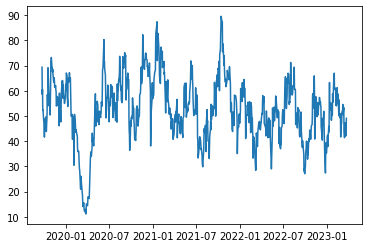

In [43]:
plt.plot(time_test_labels,rsi_values)

Moving Average Convergence Divergence (MACD):

In [44]:
## Calculate the MACD and Signal Line indicators
## Calculate the Short Term Exponential Moving Average
ShortEMA = final_data.Predictions.ewm(span=12, adjust=False).mean() 
## Calculate the Long Term Exponential Moving Average
LongEMA = final_data.Predictions.ewm(span=26, adjust=False).mean() 
## Calculate the Moving Average Convergence/Divergence (MACD)
MACD = ShortEMA - LongEMA
## Calcualte the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

In [45]:
# MACD_df = pd.DataFrame(MACD)
# MACD_df.to_csv("MACD.csv")

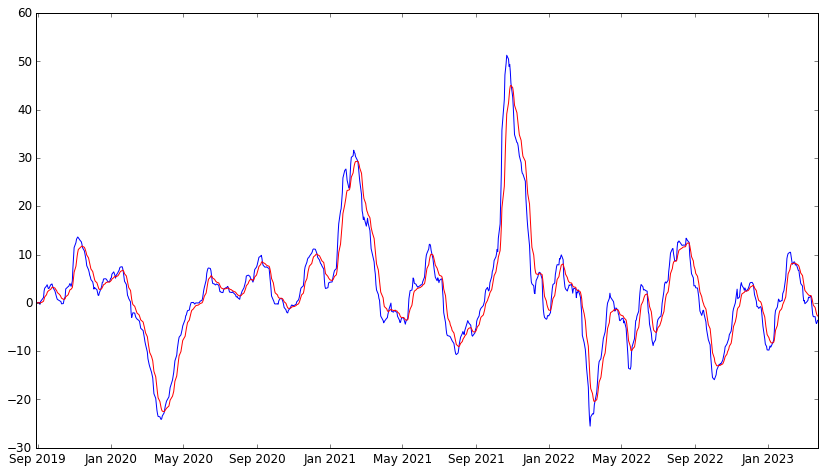

In [46]:
plt.figure(figsize=(14,8))
plt.style.use('classic')
plt.plot(final_data.index, MACD, label='Tata Motors MACD', color = 'blue')
plt.plot(final_data.index, signal, label='Signal Line', color='red')
plt.show()

In [47]:
final_data['EMA50_200_Signal'] = 0.0  
final_data['EMA50_200_Signal'] = np.where(final_data['EMA50'] > final_data['EMA200'], "Buy", "Sell")

In [48]:
final_data

,Predictions,RSI,MCAD,EMA50,EMA200,EMA26,EMA13,Action,EMA50_200_Signal
Date,,,,,,,,,
2019-08-30,114.077,NaN,0.000000,114.077000,114.077000,114.077000,114.077000,Sell,Sell
2019-09-03,115.210,NaN,0.090382,114.121431,114.088274,114.160926,114.238857,Buy,Buy
2019-09-04,114.033,NaN,0.066272,114.117964,114.087724,114.151450,114.209449,Buy,Buy
2019-09-05,109.446,NaN,-0.319287,113.934749,114.041537,113.802898,113.528956,Sell,Sell
2019-09-06,120.325,NaN,0.250115,114.185347,114.104059,114.286017,114.499820,Buy,Buy
...,...,...,...,...,...,...,...,...,...
2023-03-20,420.879,47.347025,-2.854764,424.803370,423.511718,425.861759,423.420968,Sell,Buy
2023-03-21,408.976,42.046067,-3.762581,424.182689,423.367084,424.610962,421.357401,Sell,Buy
2023-03-22,410.799,43.096850,-4.285532,423.657838,423.242028,423.587854,419.849058,Sell,Buy


In [49]:
final_data["MCAD_Signal"] = 0.0
final_data['MCAD_Signal'] = np.where(final_data['MCAD'] > 0, "Buy", "Sell")


In [50]:
final_data["RSI_Signal"] = 0.0


final_data['RSI_Signal'] = np.where((final_data['RSI'] > 30) & (final_data['RSI']<60), "Buy", "Sell")

In [51]:
#EMA26 and 13 signal
final_data["EMA_13_16_Signal"] = 0.0


final_data['EMA_13_16_Signal'] = np.where(final_data['EMA13'] > final_data['EMA26'], "Buy", "Sell")

In [52]:
final_data

,Predictions,RSI,MCAD,EMA50,EMA200,EMA26,EMA13,Action,EMA50_200_Signal,MCAD_Signal,RSI_Signal,EMA_13_16_Signal
Date,,,,,,,,,,,,
2019-08-30,114.077,NaN,0.000000,114.077000,114.077000,114.077000,114.077000,Sell,Sell,Sell,Sell,Sell
2019-09-03,115.210,NaN,0.090382,114.121431,114.088274,114.160926,114.238857,Buy,Buy,Buy,Sell,Buy
2019-09-04,114.033,NaN,0.066272,114.117964,114.087724,114.151450,114.209449,Buy,Buy,Buy,Sell,Buy
2019-09-05,109.446,NaN,-0.319287,113.934749,114.041537,113.802898,113.528956,Sell,Sell,Sell,Sell,Sell
2019-09-06,120.325,NaN,0.250115,114.185347,114.104059,114.286017,114.499820,Buy,Buy,Buy,Sell,Buy
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-20,420.879,47.347025,-2.854764,424.803370,423.511718,425.861759,423.420968,Sell,Buy,Sell,Buy,Sell
2023-03-21,408.976,42.046067,-3.762581,424.182689,423.367084,424.610962,421.357401,Sell,Buy,Sell,Buy,Sell
2023-03-22,410.799,43.096850,-4.285532,423.657838,423.242028,423.587854,419.849058,Sell,Buy,Sell,Buy,Sell


In [53]:
signals = final_data.iloc[::,7:11]

In [54]:
signals

,Action,EMA50_200_Signal,MCAD_Signal,RSI_Signal
Date,,,,
2019-08-30,Sell,Sell,Sell,Sell
2019-09-03,Buy,Buy,Buy,Sell
2019-09-04,Buy,Buy,Buy,Sell
2019-09-05,Sell,Sell,Sell,Sell
2019-09-06,Buy,Buy,Buy,Sell
...,...,...,...,...
2023-03-20,Sell,Buy,Sell,Buy
2023-03-21,Sell,Buy,Sell,Buy
2023-03-22,Sell,Buy,Sell,Buy


In [55]:
def buy_or_sell(row):
    buy_count = sum(row == "Buy")
    if buy_count >= 3:
        return "Buy"
    else:
        return "Sell"

In [56]:
def buy_or_sell(row):
    buy_count = sum(row == "Buy")
    if buy_count >= 3:
        return "Buy"
    else:
        return "Sell"

# Apply the function to each row of the DataFrame
signals['Action'] = signals.apply(buy_or_sell, axis=1)

# Print the resulting DataFrame with the "Action" column added
signals

,Action,EMA50_200_Signal,MCAD_Signal,RSI_Signal
Date,,,,
2019-08-30,Sell,Sell,Sell,Sell
2019-09-03,Buy,Buy,Buy,Sell
2019-09-04,Buy,Buy,Buy,Sell
2019-09-05,Sell,Sell,Sell,Sell
2019-09-06,Buy,Buy,Buy,Sell
...,...,...,...,...
2023-03-20,Sell,Buy,Sell,Buy
2023-03-21,Sell,Buy,Sell,Buy
2023-03-22,Sell,Buy,Sell,Buy


In [57]:
signals["Action"].to_csv("final_action.csv")

FINAL PREDICTIONS

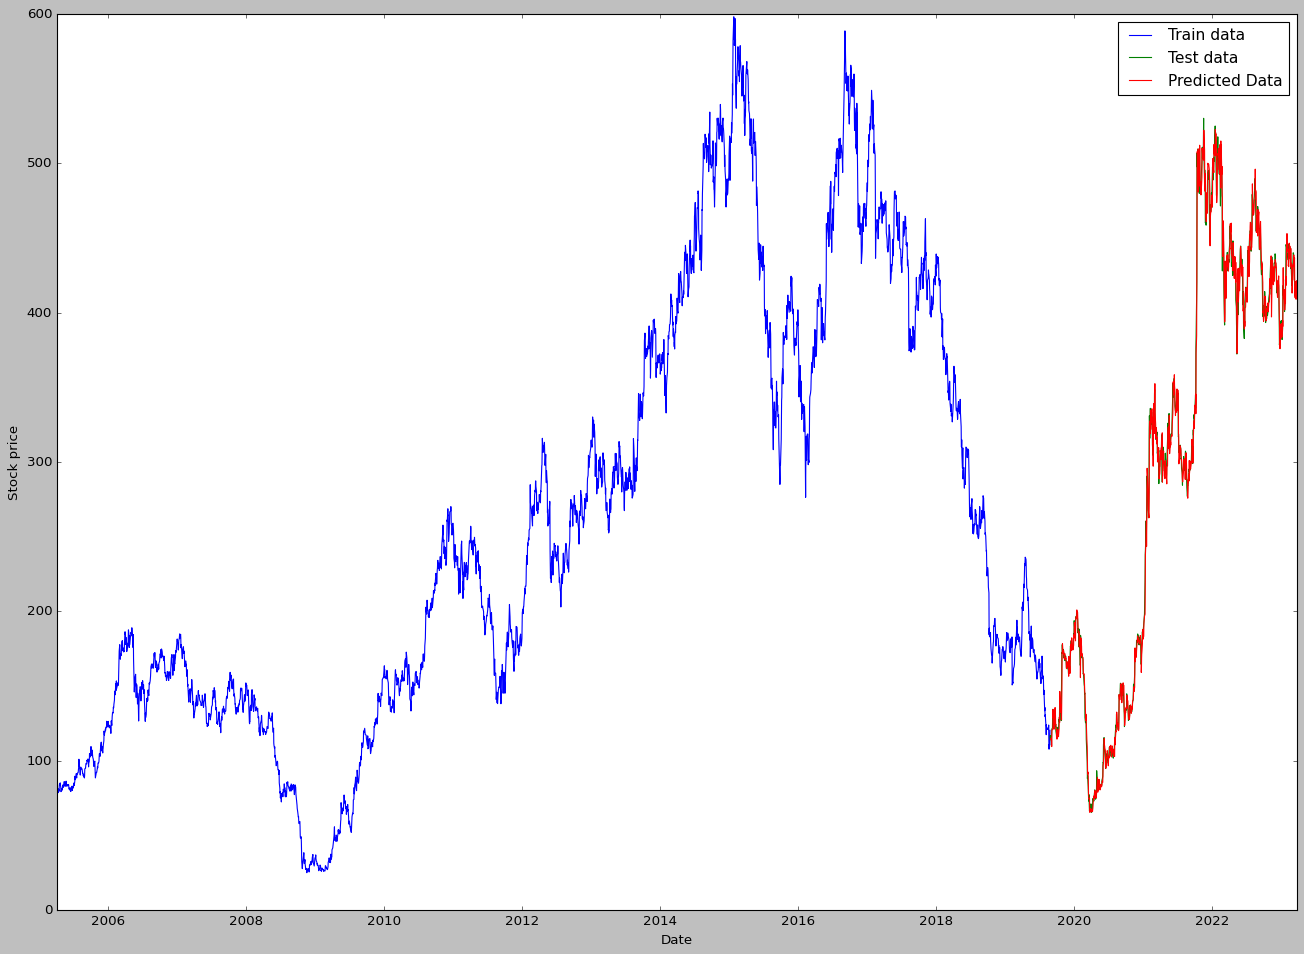

In [58]:
plt.figure(figsize=(20, 14))
plt.plot(X_train, y_train, label="Train data")
plt.plot(X_test, y_test, label="Test data")
plt.plot(time_test_labels,predictions,label = "Predicted Data")
plt.xlabel("Date")
plt.ylabel("Stock price")
plt.legend(fontsize=14)
plt.show()

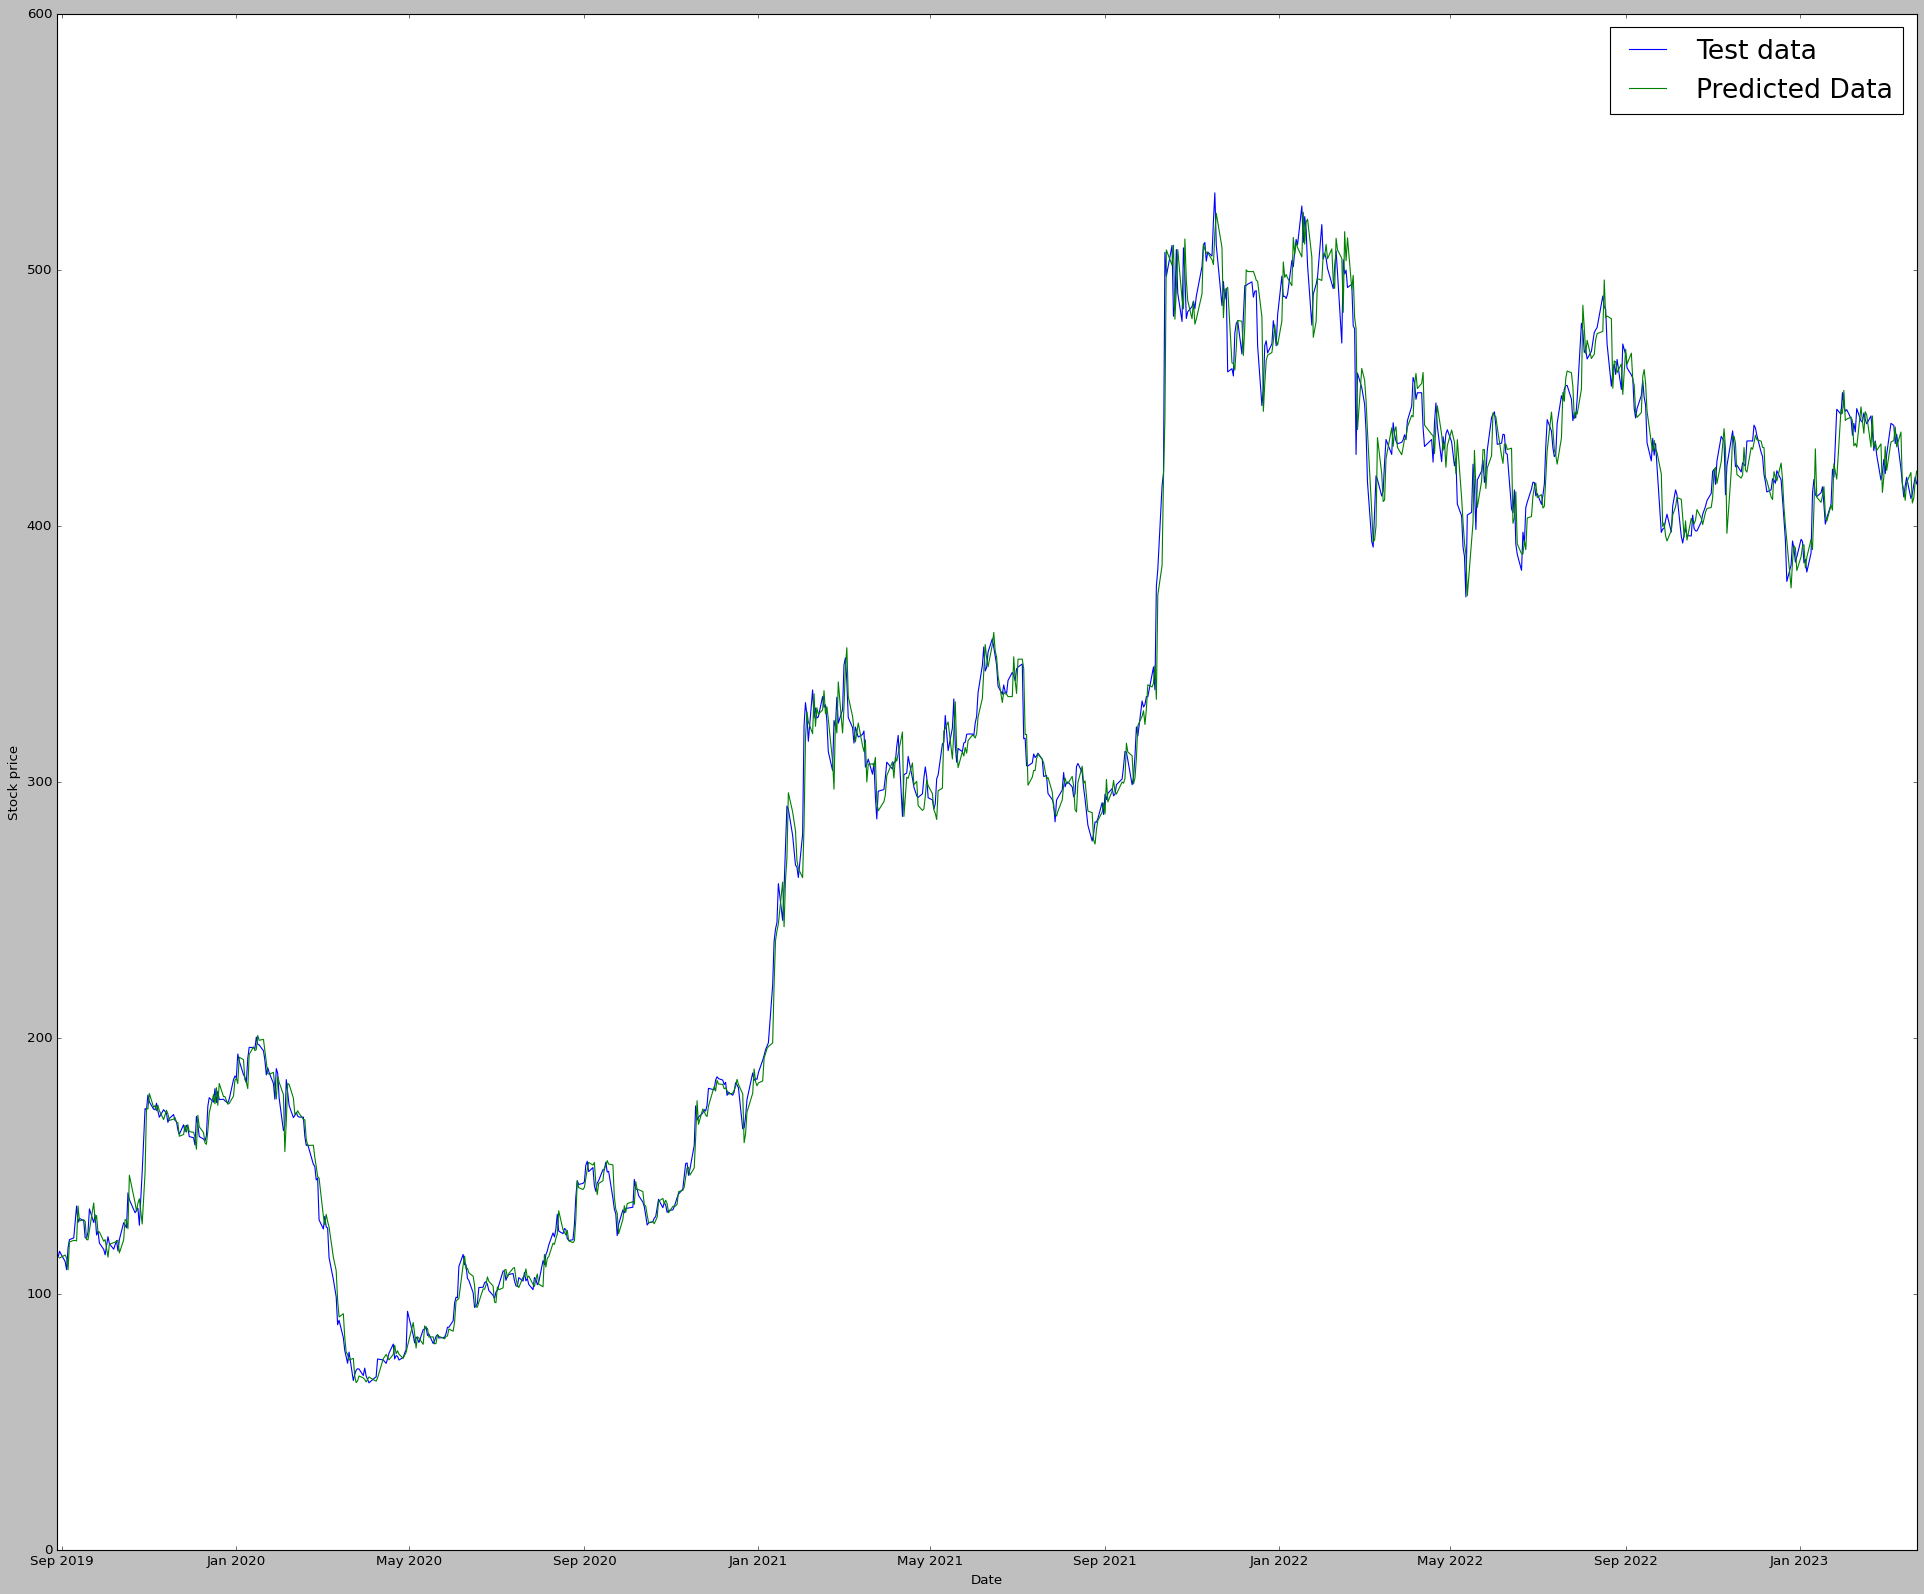

In [59]:
#Zoomed in Visualisation for predicted data
plt.figure(figsize=(30, 24))
plt.plot(X_test, y_test, label="Test data")
plt.plot(time_test_labels,predictions,label = "Predicted Data")
plt.xlabel("Date")
plt.ylabel("Stock price")
plt.legend(fontsize=24)
plt.show()

**Visualizing the Buy Values**

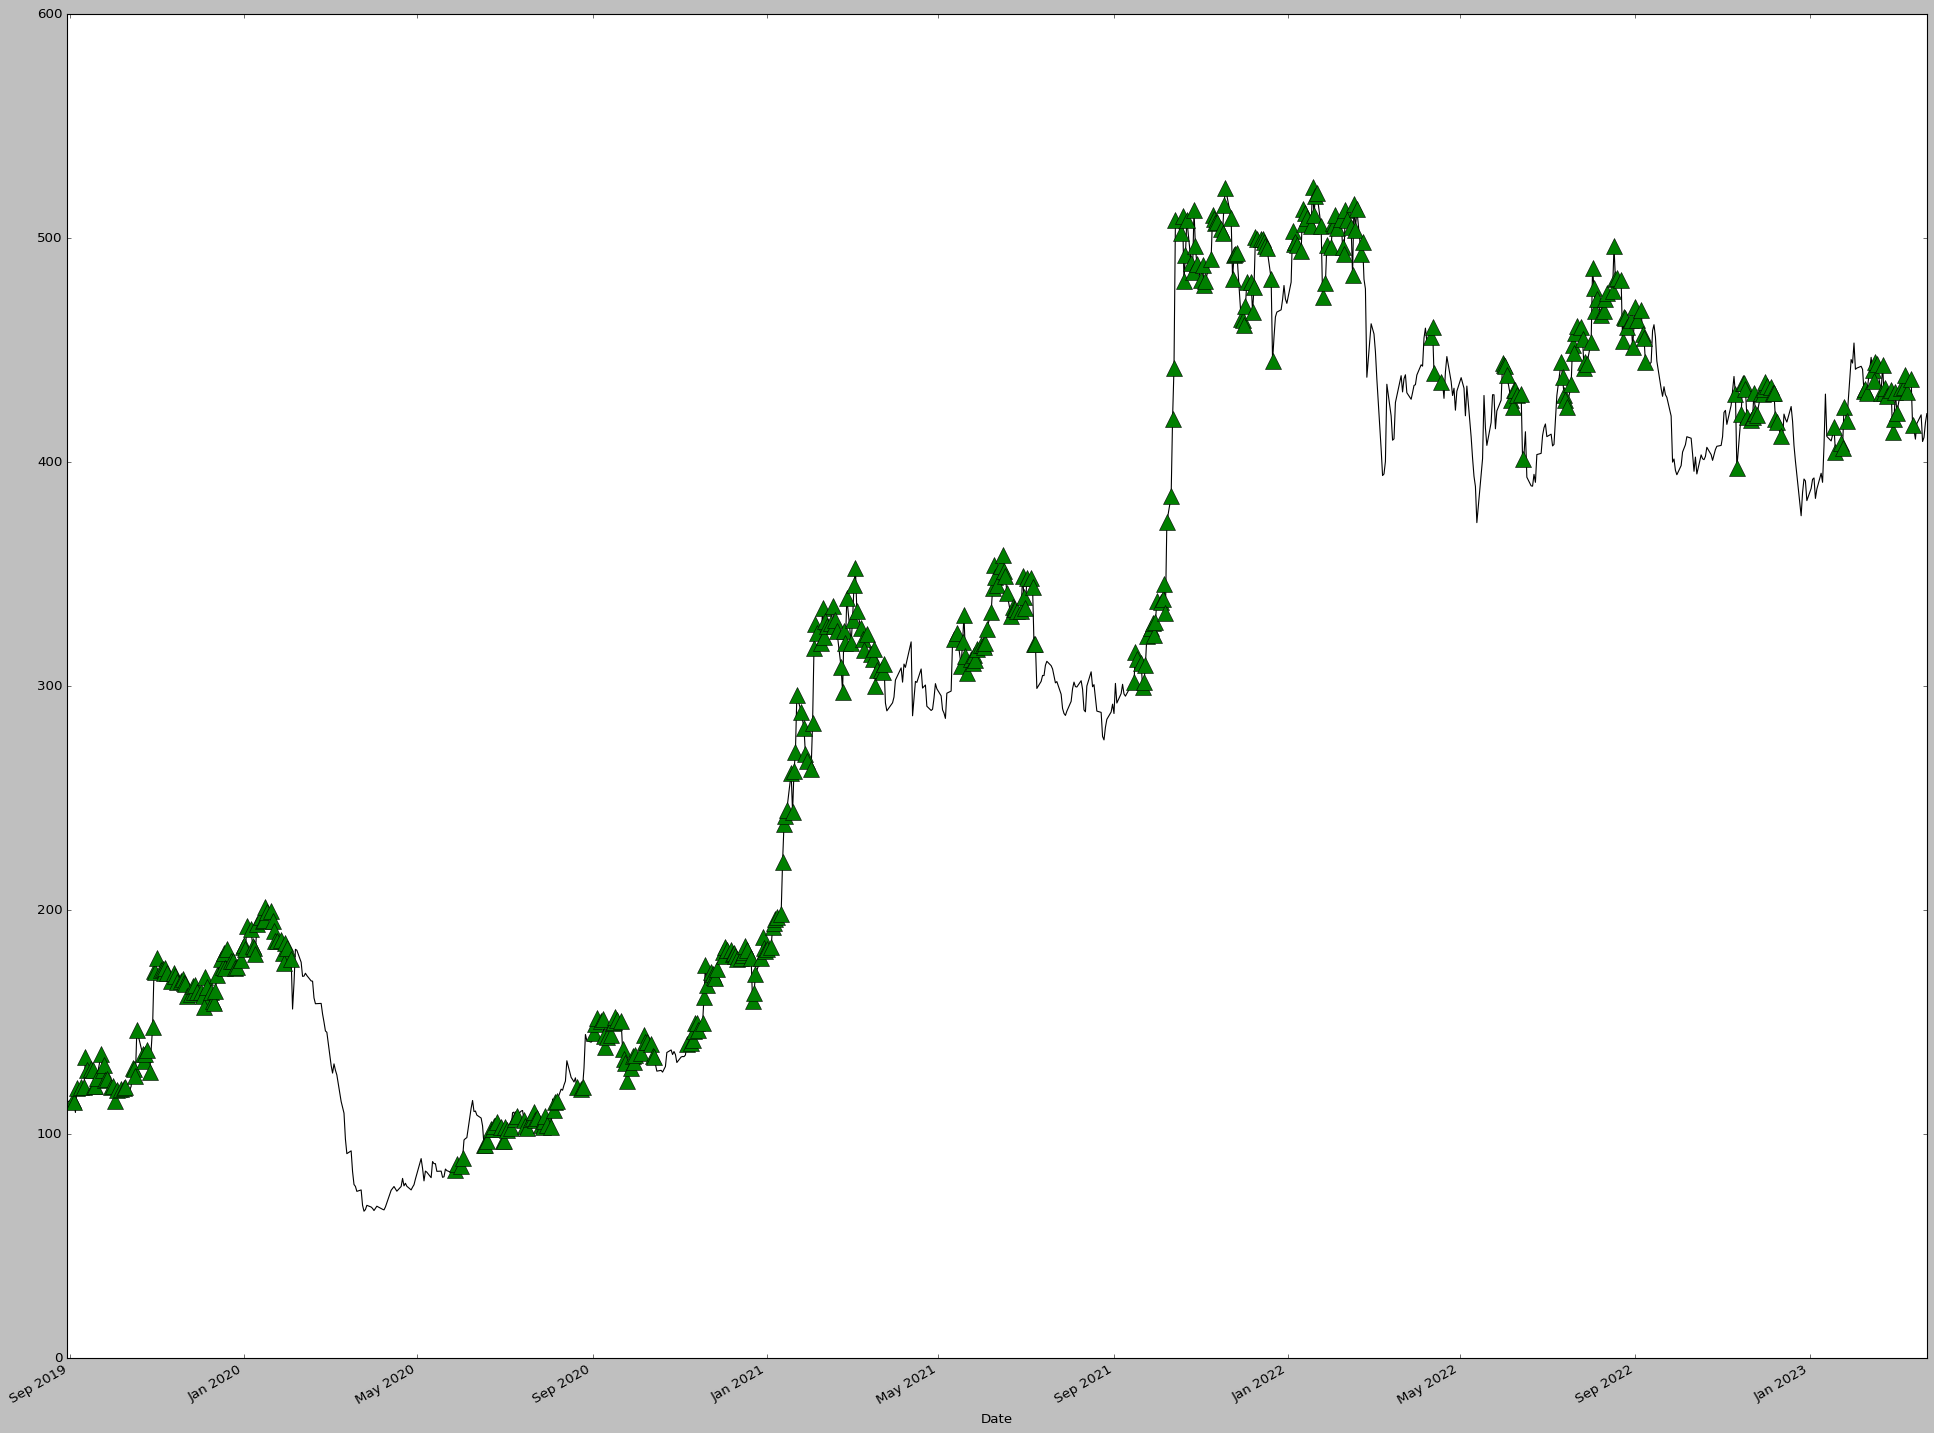

In [62]:
plt.figure(figsize=(30, 24))
final_data['Predictions'].plot(color = 'k', label='Predictions') 
plt.plot(final_data[final_data["Action"] == "Buy"].index, 
         final_data["Predictions"][final_data["Action"] == "Buy"], 
         "^", markersize = 15, color = 'g', label = 'buy')